<a href="https://colab.research.google.com/github/tulayppppp/Yeni-klas-r/blob/main/medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from warnings import filterwarnings
filterwarnings('ignore')


hiperparametri optimizasyonu deniyorum


In [2]:
X, y = load_wine(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)

base model

In [4]:
rf_base_model = RandomForestClassifier()
rf_base_model.fit(X_train,y_train)
y_pred  = rf_base_model.predict(X_test)
base_accuracy = accuracy_score(y_test,y_pred)
print('rf base model accuracy score = {}'.format(base_accuracy))

rf base model accuracy score = 0.9629629629629629


manuel

[0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9259259259259259]


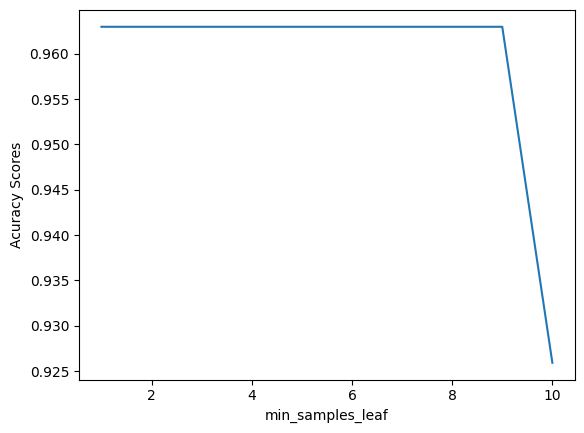

In [5]:
acc_scores = []
for n in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=n).fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

print(acc_scores)
import matplotlib.pyplot as plt
plt.plot(range(1,11), acc_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('Acuracy Scores')
plt.show()

gridsearch


In [6]:
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_gridcv_model = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_gridcv_model.best_params_
print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
rf gridcv model accuracy score = 0.992


In [7]:
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_randomcv_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_randomcv_model.best_params_
print('rf randomcv model accuracy score = {}'.format(rf_randomcv_model.best_score_))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
rf randomcv model accuracy score = 0.992


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.style as mplstyle

In [18]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred)
#from sklearn.metrics import accuracy_score
#accuracy_score(y_true, y_pred)
# Recall
#from sklearn.metrics import recall_score
#recall_score(y_true, y_pred, average=None)
# Precision
#from sklearn.metrics import precision_score
#precision_score(y_true, y_pred, average=None)

NameError: ignored

In [20]:
#def plot_confusion_matrix(y_test, y_pred):
#mtx = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
#plt.ylabel('true label')
#plt.xlabel('predicted label')
#plot_confusion_matrix(y_test, y_pred.round())

IndentationError: ignored

In [22]:
#from sklearn.metrics import f1_score
#f1_score(y_true, y_pred, average=None)

NameError: ignored

In [27]:
#probs = predict_proba(X_test)
#probs = probs[:, 1]
s#vm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
#svm_auc = metrics.roc_auc_score(y_test, probs)

NameError: ignored

NameError: ignored

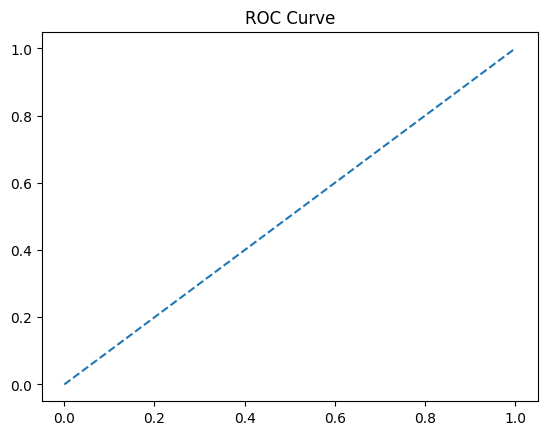

In [28]:
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()